# import python lib

In [1]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


connect to DB

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [3]:
cur=conn.cursor()

# Q 3.1

using panda to show all records in student table

In [8]:
sql_statement = """
select * from gp15.students
"""


In [10]:
cur.execute(sql_statement)

In [13]:
df=pandas.read_sql_query(sql_statement,conn)
df[:]

,s_email,s_name,s_major
0,1@email.com,Sean A,Biology
1,2@email.com,Sean B,Chemistry
2,3@email.com,Sean C,Astronomy
3,4@email.com,Sean D,Management\n
4,5@email.com,Sean E,IA
5,6@email.com,Sean F,Business
6,7@email.com,Sean G,Art
7,8@email.com,Sean H,Astronomy
8,9@email.com,Sean Z,Physics
9,10@email.com,Sean X,Arab Studies


# Q 3.2

In [4]:
sql_statement = """
select gp15.professors.p_name, gp15.courses.c_name
from gp15.professors
inner join gp15.courses
on gp15.professors.p_email = gp15.courses.p_email

"""

In [5]:
cur.execute(sql_statement)

In [6]:
df=pandas.read_sql_query(sql_statement,conn)
df[:]

,p_name,c_name
0,John Robinson,IA
1,Stephen Marrin,Introduction to Tables
2,Bob Kolvoord,Introduction to Databases
3,thename,course
4,thename,Art


# Q 3.3

In [16]:
sql_statement = """
select c_number, 
count (c_number) as enrolled
from gp15.enroll_list
group by c_number
order by enrolled desc
"""

In [17]:
cur.execute(sql_statement)

<AxesSubplot:xlabel='c_number'>

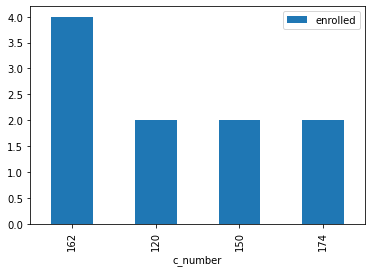

In [18]:
df_price=pandas.read_sql_query(sql_statement,conn)

df_price.plot.bar(x='c_number',y='enrolled')

# Q 3.4

In [19]:
sql_statement= """
select gp15.courses.c_name, gp15.professors.p_name,
count(gp15.courses.c_name) as numberofcourses
from gp15.professors
inner join gp15.courses
on gp15.professors.p_email = gp15.courses.p_email
group by gp15.professors.p_name, gp15.courses.c_name
"""

In [20]:
cur.execute(sql_statement)

<AxesSubplot:xlabel='p_name'>

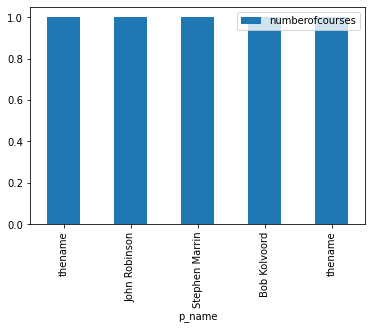

In [21]:
df_price=pandas.read_sql_query(sql_statement,conn)

df_price.plot.bar(x='p_name',y='numberofcourses')

# Q 3.5

In [22]:
sql_statement= """
insert into gp15.professors(p_email,p_name,p_office)
values('ok@gmail.com','profname','2222')

"""

In [23]:
cur.execute(sql_statement)

In [24]:
sql_statement = """
insert into gp15.courses(c_name,c_number,p_email,c_room_number)
values('acourse','anumber','ok@gmail.com','234')

"""

In [25]:
cur.execute(sql_statement)

In [26]:
sql_statement= """
select * from gp15.professors
"""

In [27]:
cur.execute(sql_statement)

In [28]:
df=pandas.read_sql_query(sql_statement,conn)
df[:]

,p_email,p_name,p_office
0,kolvoora@jmu.edu,Bob Kolvoord,ISAT 370
1,marrinsp@jmu.edu,Stephen Marrin,ENGEO 2104
2,robinsja@jmu.edu,John Robinson,ISAT 127
3,1111@gmail.com,thename,11111
4,ok@gmail.com,profname,2222


In [29]:
sql_statement= """
select * from gp15.courses

"""

In [30]:
cur.execute(sql_statement)

In [31]:
df=pandas.read_sql_query(sql_statement,conn)
df[:]

,c_number,c_name,c_room_number,p_email
0,150,IA,ENGEO 214,robinsja@jmu.edu
1,162,Introduction to Tables,ENGEO 337,marrinsp@jmu.edu
2,174,Introduction to Databases,ENGEO 440,kolvoora@jmu.edu
3,thenumber,course,123,1111@gmail.com
4,120,Art,ISAT 200,1111@gmail.com
5,anumber,acourse,234,ok@gmail.com


# Q 3.6

In [32]:
sql_statement = """
update gp15.courses
set p_email = 'ok@gmail.com'
where p_email = '1111@gmail.com'


"""

In [33]:
cur.execute(sql_statement)

In [34]:
sql_statement = """
select * from gp15.courses

"""

In [35]:
cur.execute(sql_statement)

In [36]:
df=pandas.read_sql_query(sql_statement,conn)
df[:]

,c_number,c_name,c_room_number,p_email
0,150,IA,ENGEO 214,robinsja@jmu.edu
1,162,Introduction to Tables,ENGEO 337,marrinsp@jmu.edu
2,174,Introduction to Databases,ENGEO 440,kolvoora@jmu.edu
3,anumber,acourse,234,ok@gmail.com
4,thenumber,course,123,ok@gmail.com
5,120,Art,ISAT 200,ok@gmail.com


In [37]:
cur.close()
conn.close()